## !pip install opencv-python

In [1]:
!pip install opencv-python

In [2]:
import cv2
image = cv2.imread("pic.jpg")

In [3]:
# convert to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [4]:
import numpy as np
from matplotlib import pyplot as plt

In [5]:
# reshape the image to a 2D array of pixels and 3 color values (RGB)
pixel_values = image.reshape((-1, 3))
# convert to float
pixel_values = np.float32(pixel_values)

In [6]:
pixel_values.shape

(340180, 3)

Type of termination criteria. It has 3 flags as below:
* #### cv.TERM_CRITERIA_EPS — stop the algorithm iteration if specified accuracy, epsilon, is reached.
* #### cv.TERM_CRITERIA_MAX_ITER — stop the algorithm after the specified number of iterations, max_iter.
* #### cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER — stop the iteration when any of the above condition is met.

#### Play around with different criteria to check if results change

In [24]:
# define stopping criteria
criteria = (cv2.TERM_CRITERIA_MAX_ITER , 150, 0.5)
#criteria = (cv2.TERM_CRITERIA_EPS,50,0.5)

### Choose number of clusters for your image. Play around with this number to see what results you get. How do you decide the right number

In [49]:
# number of clusters (K)
k = 20
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

In [50]:
# convert back to 8 bit values
centers = np.uint8(centers)

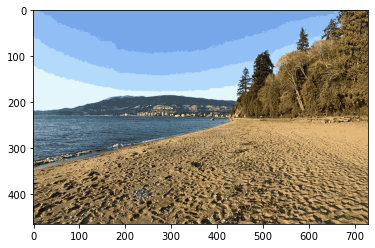

In [51]:
# flatten the labels array
labels = labels.flatten()

# convert all pixels to the color of the centroids
segmented_image = centers[labels.flatten()]

# reshape back to the original image dimension
segmented_image = segmented_image.reshape(image.shape)
# show the image
plt.imshow(segmented_image)
plt.show()

#### code source
https://www.thepythoncode.com/article/kmeans-for-image-segmentation-opencv-python